> **Note:** In most sessions you will be solving exercises posed in a Jupyter notebook that looks like this one. Because you are cloning a Github repository that only we can push to, you should **NEVER EDIT** any of the files you pull from Github. Instead, what you should do, is either make a new notebook and write your solutions in there, or **make a copy of this notebook and save it somewhere else** on your computer, not inside the `sds` folder that you cloned, so you can write your answers in there. If you edit the notebook you pulled from Github, those edits (possible your solutions to the exercises) may be overwritten and lost the next time you pull from Github. This is important, so don't hesitate to ask if it is unclear.

# Exercise Set 7: Peer effects 

*February 20, 2019*

In this Exercise Set 7 we will investigate peer effects data. 

## 7.1: roommate peer effects


<br>
<br>

Due to a lack of available peer effects data we will use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 7.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [135]:
# [Answer to ex. 7.1.1 here]

In [1]:
import numpy as np
import pandas as pd 

df = pd.read_csv('peer_effects_room.csv')

room_persons = df.groupby('room').person.unique()

df['room_persons'] = df.room.map(room_persons)
df['person_other'] = df.apply(lambda row: np.setdiff1d(row['room_persons'], row['person'])[0], axis=1)

df.head()

,person,room,high_school_GPA,college_GPA,room_persons,person_other
0,0,598,-2.063223,-1.413379,"[0, 1757]",1757
1,1,86,-0.657806,-0.292274,"[1, 1916]",1916
2,2,577,-1.121648,-1.037842,"[2, 992]",992
3,3,534,-1.836840,-2.328040,"[3, 1501]",1501
4,4,603,0.108092,-0.360314,"[4, 849]",849


<br>

> **Ex. 7.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [6]:
# [Answer to ex. 7.1.2 here]

In [2]:
df2 = df.merge(df[['person','high_school_GPA', 'college_GPA']].add_suffix('_other'))
df2.head()

,person,room,high_school_GPA,college_GPA,room_persons,person_other,high_school_GPA_other,college_GPA_other
0,0,598,-2.063223,-1.413379,"[0, 1757]",1757,-1.443647,-1.249804
1,1,86,-0.657806,-0.292274,"[1, 1916]",1916,-0.967511,-1.258121
2,2,577,-1.121648,-1.037842,"[2, 992]",992,0.362481,-0.164821
3,3,534,-1.836840,-2.328040,"[3, 1501]",1501,2.132176,2.162730
4,4,603,0.108092,-0.360314,"[4, 849]",849,-0.885417,-1.345020


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 7.1.3:** plot own GPA in high school vs college in a scatter plot.

In [8]:
# [Answer to ex. 7.1.3 here]

/home/kristian/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


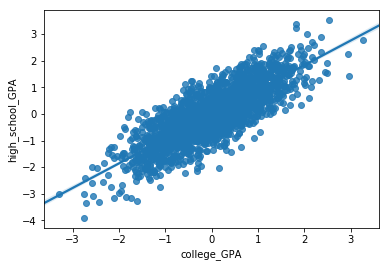

In [10]:
import seaborn as sns
sns.regplot('college_GPA','high_school_GPA', df2)

<br>
We want to check there is random assignment of roommates. 

> **Ex. 7.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

In [11]:
# [Answer to ex. 7.1.4 here]

In [1]:
# [This problem will be in assignment 2]

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 7.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

In [16]:
# [Answer to ex. 7.1.5 here]

In [2]:
# [This problem will be in assignment 2]

We now move on to analyze **endogenous** peer effects.

> **Ex. 7.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

In [138]:
# [Answer to ex. 7.1.6 here]

In [19]:
import statsmodels.formula.api as smf

model_peer = smf.ols('college_GPA ~ high_school_GPA + college_GPA_other', df2).fit()
model_peer_cluster_se = model_peer.get_robustcov_results(cov_type='cluster',groups=df2.room)
model_peer_cluster_se.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            college_GPA   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2030.
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:42:45   Log-Likelihood:                -1561.0
No. Observations:                2000   AIC:                             3128.
Df Residuals:                    1997   BIC:                             3145.
Df Model:                           2                                         
Covariance Type:              cluster                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0090      0.012      0.749      0.454      -0.015       0.033
high_school_GPA       0.7021      0.011     63.326      0.000       0.680       0.724
college_GPA_other     0.0479      0.015      3.245      0.001       0.019       0.077
==============================================================================
Omnibus:                        1.042   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.956
Skew:                           0.025   Prob(JB):                        0.620
Kurtosis:                       3.095   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
"""

<br>
<br>

# 7.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.org/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf). If you do not speak Danish talk to your group about the content.
> **Ex. 7.2.1:** Explain the identification strategy in words.

> **Ex. 7.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w7867.pdf) test for?

> **Ex. 7.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.